## **PROJECT MACHINE LEARNING (LAB)**
## **Anggota Kelompok 2:**
##### 1.(2208108010061) Musliadi
##### 2.(2208108010065) Shafarina Irzani
##### 3.(2208108010075) Marniati Bancin

#### **Kasus:**
 Dengan populasi dunia yang mencapai 7 miliar, pengembangan deteksi jenis kelamin dan umur dari foto menjadi semakin penting dalam berbagai aspek:

##### 1. Pemasaran dan Analisis Konsumen: Informasi tentang jenis kelamin dan umur dari konsumen membantu perusahaan dalam mengarahkan strategi pemasaran dengan lebih tepat sasaran, memungkinkan kampanye yang lebih efektif dan penggunaan sumber daya yang lebih efisien.
#####2. Pengenalanan Wajah dan Keamanan: Dalam skala populasi yang besar, deteksi jenis kelamin dan umur berperan penting dalam keamanan publik, memfasilitasi identifikasi individu, dan manajemen akses ke area tertentu.
#####3. Pelayanan Kesehatan dan Pengembangan Obat: Informasi tentang jenis kelamin dan umur membantu pengembangan obat dan terapi yang lebih disesuaikan, meningkatkan efektivitas pengobatan dan mengurangi risiko efek samping.
#####4. Pengalaman Pengguna di Teknologi: Dalam aplikasi teknologi, deteksi jenis kelamin dan umur digunakan untuk memberikan pengalaman pengguna yang lebih personal dan disesuaikan, meningkatkan kualitas layanan dan kepuasan pengguna.
#####5. Penelitian Sosial dan Demografi: Informasi demografis seperti jenis kelamin dan umur penting dalam penelitian sosial dan demografi, membantu dalam memahami tren populasi, kesenjangan sosial, dan dinamika demografis.

Dengan demikian, dalam era populasi dunia yang besar ini, deteksi jenis kelamin dan umur dari foto memiliki peran yang semakin penting dalam pengambilan keputusan, pengembangan teknologi, dan penelitian.

In [ ]:
from tensorflow.keras.utils import load_img
from keras.models import Sequential, Model
from keras. layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip 'drive/My Drive/ML/UTKFace1.zip'

Streaming output truncated to the last 5000 lines.
  inflating: UTKFace1/30_0_0_20170117140008320.jpg.chip.jpg  
  inflating: UTKFace1/30_0_0_20170117140513184.jpg.chip.jpg  
  inflating: UTKFace1/30_0_0_20170117140805766.jpg.chip.jpg  
  inflating: UTKFace1/30_0_0_20170117141701441.jpg.chip.jpg  
  inflating: UTKFace1/30_0_0_20170117141919242.jpg.chip.jpg  
  inflating: UTKFace1/30_0_0_20170117142111641.jpg.chip.jpg  
  inflating: UTKFace1/30_0_0_20170117142917573.jpg.chip.jpg  
  inflating: UTKFace1/30_0_0_20170117142922282.jpg.chip.jpg  
  inflating: UTKFace1/30_0_0_20170117142934426.jpg.chip.jpg  
  inflating: UTKFace1/30_0_0_20170117143256587.jpg.chip.jpg  
  inflating: UTKFace1/30_0_0_20170117143352248.jpg.chip.jpg  
  inflating: UTKFace1/30_0_0_20170117143359866.jpg.chip.jpg  
  inflating: UTKFace1/30_0_0_20170117143424561.jpg.chip.jpg  
  inflating: UTKFace1/30_0_0_20170117143444827.jpg.chip.jpg  
  inflating: UTKFace1/30_0_0_20170117143502368.jpg.chip.jpg  
  inflating: UTKFac

In [ ]:
BASE_DIR = '/content/UTKFace1'
age_labels = []
gender_labels = []
image_paths = []

image_filenames = os.listdir(BASE_DIR)
random.shuffle(image_filenames)

for image in tqdm(image_filenames):
  image_path = os.path.join(BASE_DIR, image)
  img_components = image.split('_')
  age_label = int(img_components[0])
  gender_label = int(img_components[1])

  # Append the image_path, age_label, and gender_label
  age_labels.append(age_label)
  gender_labels.append(gender_label)
  image_paths.append(image_path)

  0%|          | 0/15874 [00:00<?, ?it/s]

In [ ]:
print(f'Number of age_labels: {len(age_labels)}, Number of gender_labels: {len(gender_labels)}, Number of image_paths: {len(image_paths)}')

Number of age_labels: 15874, Number of gender_labels: 15874, Number of image_paths: 15874


In [ ]:
gender_mapping = {
    1: 'Female',
    0: 'Male'
}

In [ ]:
import pandas as pd
df = pd.DataFrame()
df['image_path'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head(5)

,image_path,age,gender
0,/content/UTKFace1/29_0_1_20170115235536036.jpg...,29,0
1,/content/UTKFace1/31_1_1_20170113012024246.jpg...,31,1
2,/content/UTKFace1/39_0_0_20170109011813551.jpg...,39,0
3,/content/UTKFace1/21_1_1_20170114031610229.jpg...,21,1
4,/content/UTKFace1/40_0_0_20170117133829948.jpg...,40,0


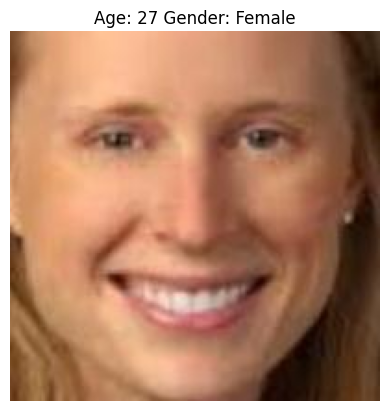

In [ ]:
from PIL import Image

rand_index = random.randint(0, len(image_paths))
age = df['age'][rand_index]
gender = df['gender'][rand_index]
IMG = Image.open(df['image_path'][rand_index])
plt.title(f'Age: {age} Gender: {gender_mapping[gender]}')
plt.axis('off')
plt.imshow(IMG)

<Axes: xlabel='age', ylabel='Density'>

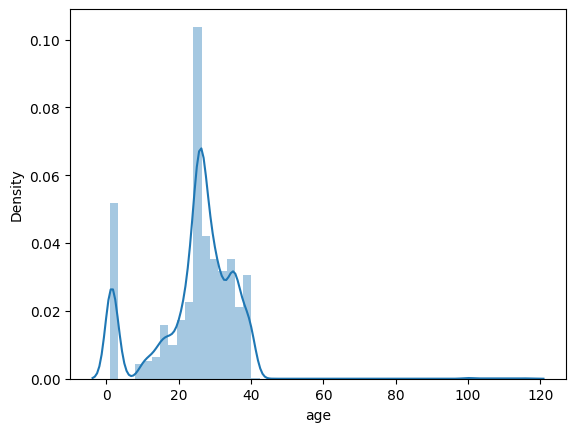

In [ ]:
#Distribusi Usia (Age)
sns.distplot(df['age'])

<Axes: ylabel='count'>

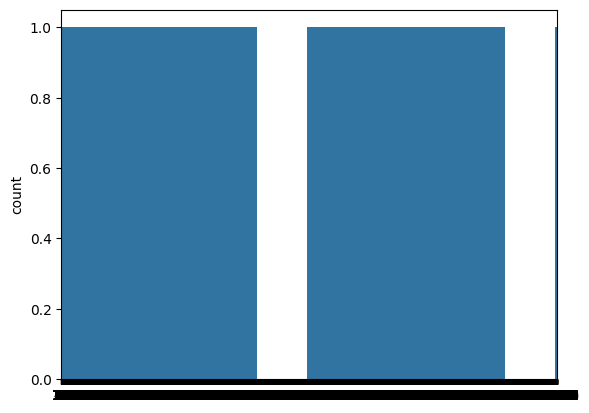

In [ ]:
#Distribusi BarPlot
sns.countplot(df['gender'])

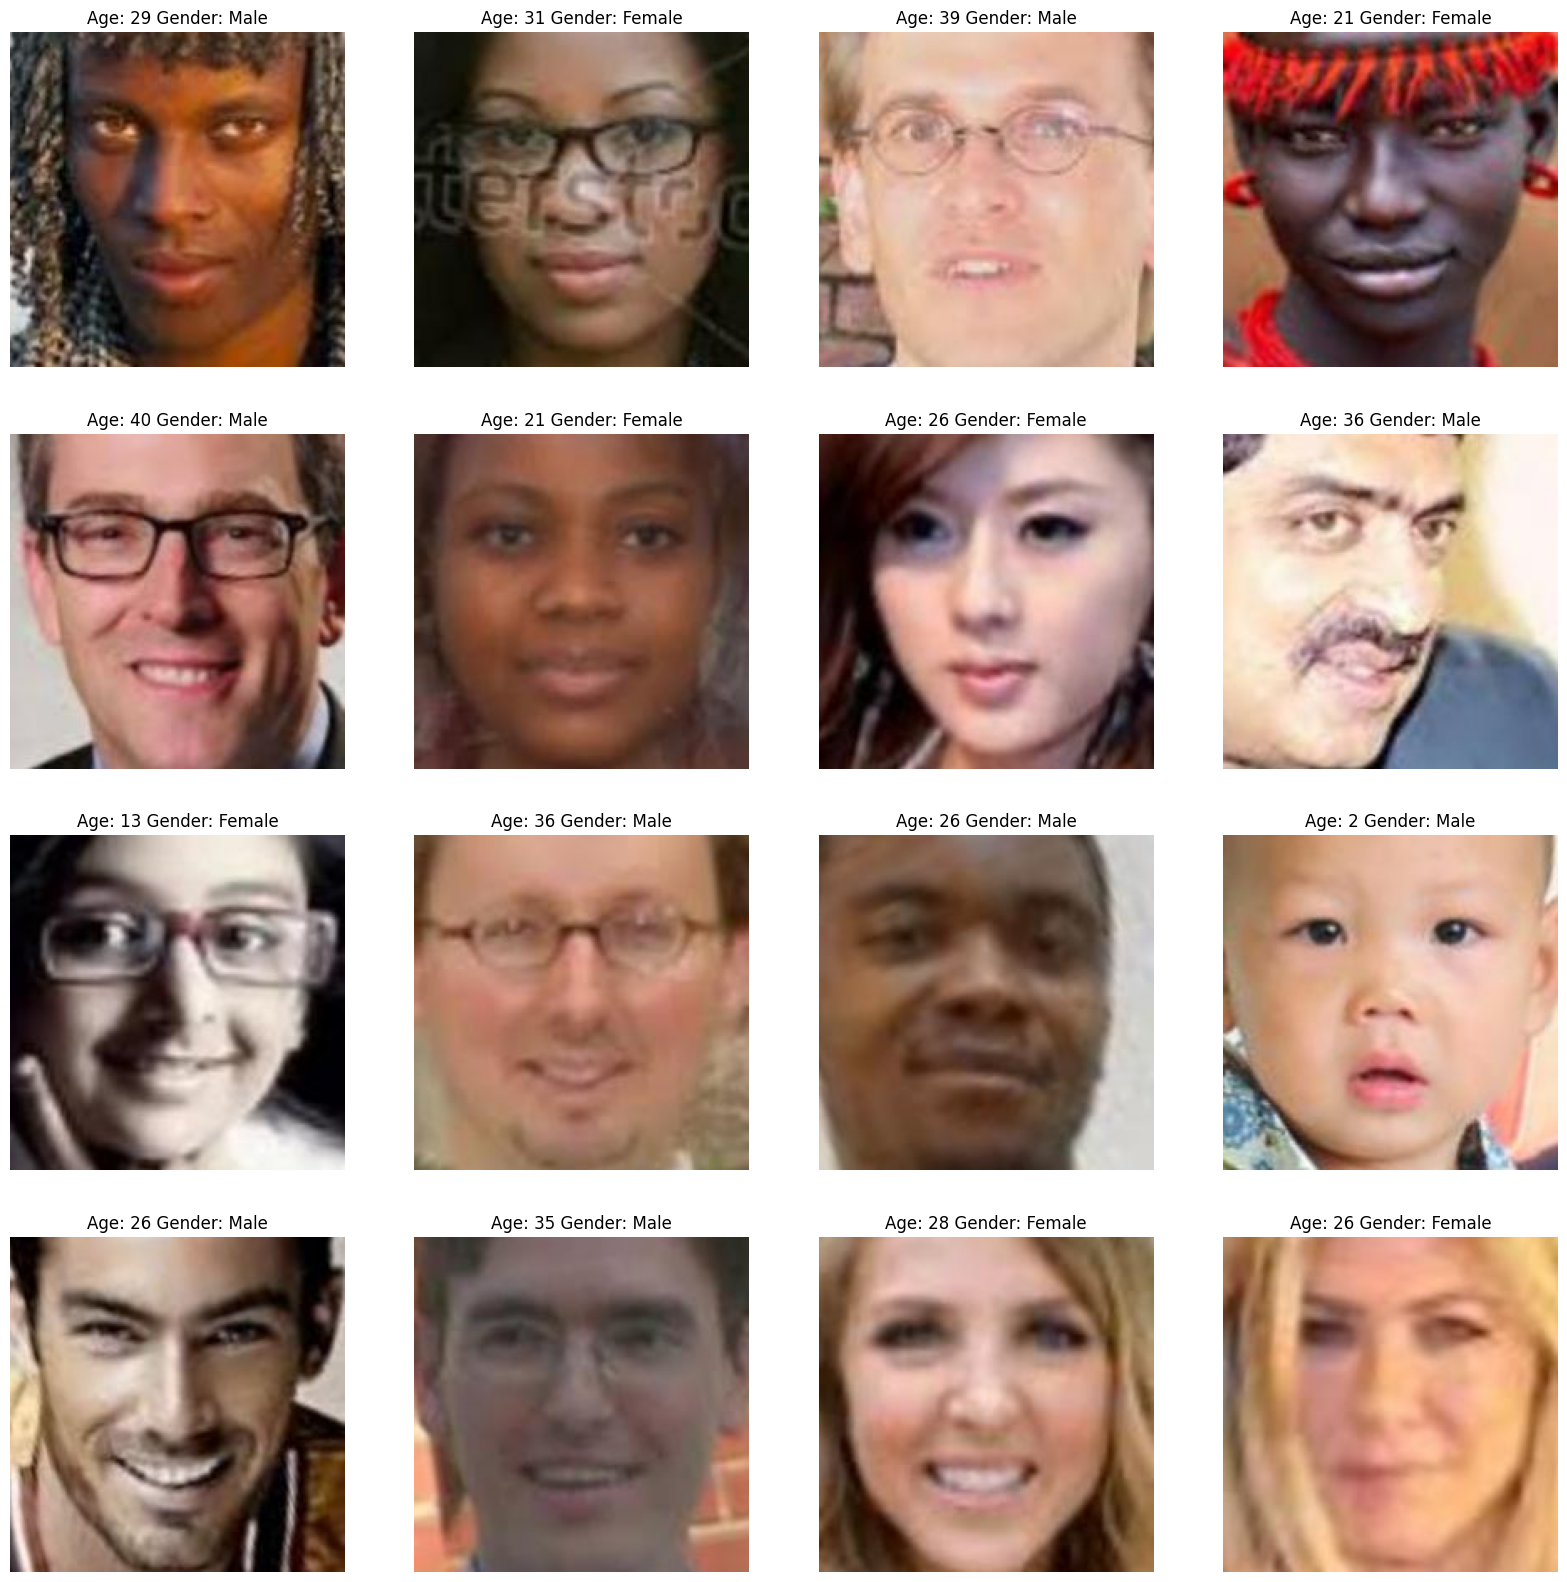

In [ ]:
#Sampel Gambar
plt.figure(figsize=(20, 20))
samples = df.iloc[0:16]

for index, sample, age, gender in samples.itertuples():
    plt.subplot(4, 4, index + 1)
    img = load_img(sample)
    img = np.array(img)
    plt.axis('off')
    plt.title(f'Age: {age} Gender: {gender_mapping[gender]}')
    plt.imshow(img)

In [ ]:
def extract_image_features(images):
    features = list()

    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)

    features = np.array(features)
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [ ]:
X = extract_image_features(df['image_path'])

  0%|          | 0/15874 [00:00<?, ?it/s]

In [ ]:
X.shape

(15874, 128, 128, 1)

In [ ]:
X = X / 255.0

In [ ]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [ ]:
input_shape = (128, 128, 1)

In [ ]:
inputs = Input((input_shape))
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
max_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(max_1)
max_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu')(max_2)
max_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu')(max_3)
max_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)

flatten = Flatten()(max_4)

#lapisan yang terhubung sepenuhnya
dense_1 = Dense(256, activation='relu')(flatten)
dense_2 = Dense(256, activation='relu')(flatten)

dropout_1 = Dropout(0.3)(dense_1)
dropout_2 = Dropout(0.3)(dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out')(dropout_1)
output_2 = Dense(1, activation='relu', name='age_out')(dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'],
              optimizer='adam', metrics=['accuracy'])

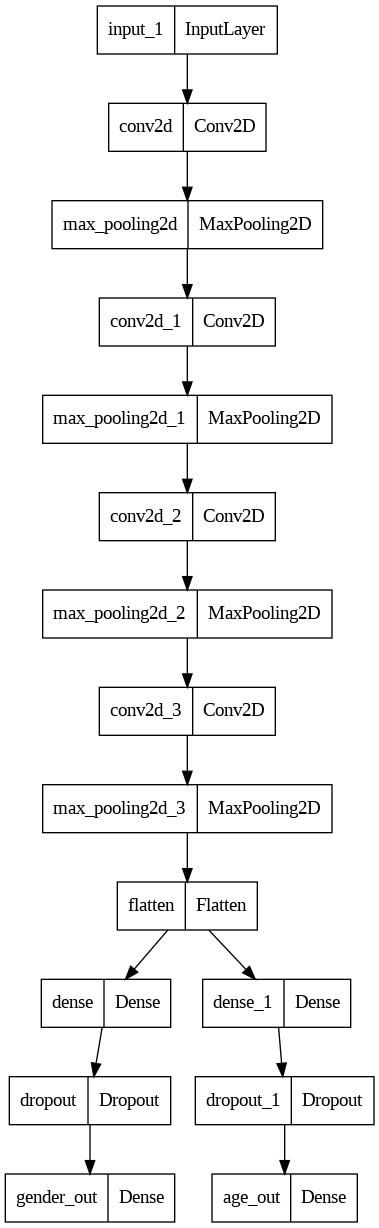

In [ ]:
# Membuat plot pada model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
#Melatih model
history = model.fit(x=X, y=[y_gender, y_age],
                    batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
397/397 [==============================] - 560s 1s/step - loss: 9.3797 - gender_out_loss: 0.7037 - age_out_loss: 8.6760 - gender_out_accuracy: 0.5237 - age_out_accuracy: 0.0727 - val_loss: 8.8461 - val_gender_out_loss: 0.6913 - val_age_out_loss: 8.1548 - val_gender_out_accuracy: 0.5017 - val_age_out_accuracy: 0.0627
Epoch 2/10
397/397 [==============================] - 551s 1s/step - loss: 7.3126 - gender_out_loss: 0.5909 - age_out_loss: 6.7217 - gender_out_accuracy: 0.6702 - age_out_accuracy: 0.0616 - val_loss: 5.6946 - val_gender_out_loss: 0.4457 - val_age_out_loss: 5.2489 - val_gender_out_accuracy: 0.7836 - val_age_out_accuracy: 0.0265
Epoch 3/10
397/397 [==============================] - 553s 1s/step - loss: 5.9025 - gender_out_loss: 0.4170 - age_out_loss: 5.4855 - gender_out_accuracy: 0.8057 - age_out_accuracy: 0.0277 - val_loss: 5.3492 - val_gender_out_loss: 0.3566 - val_age_out_loss: 4.9926 - val_gender_out_accuracy: 0.8375 - val_age_out_accuracy: 0.0113
Epoch 4/10
39

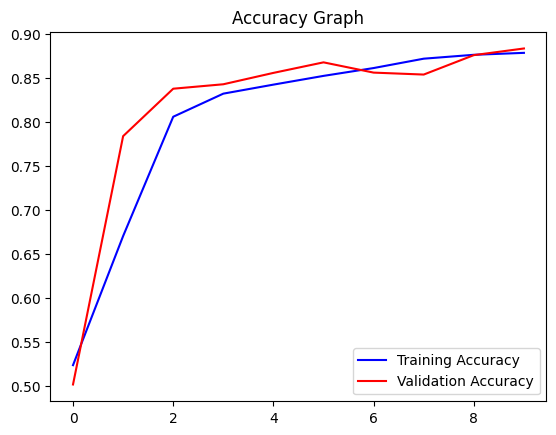

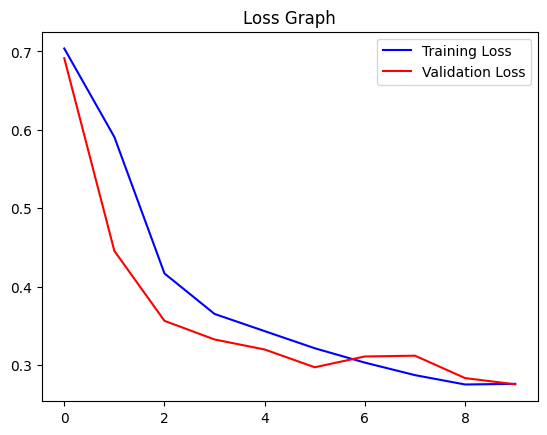

In [ ]:
# Hasil plot untuk jenis kelamin (Gender)
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['gender_out_loss']
val_loss = history.history['val_gender_out_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

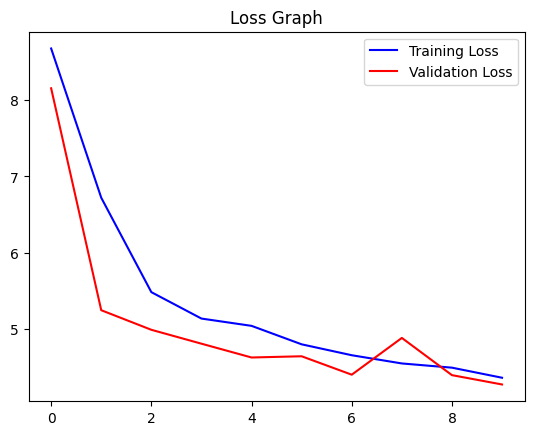

In [ ]:
# Hasil plot untuk usia (Age)
loss = history.history['age_out_loss']
val_loss = history.history['val_age_out_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [ ]:
def get_image_features(image):
  img = load_img(image, grayscale=True)
  img = img.resize((128, 128), Image.ANTIALIAS)
  img = np.array(img)
  img = img.reshape(1, 128, 128, 1)
  img = img / 255.0
  return img

1/1 [==============================] - 0s 150ms/step


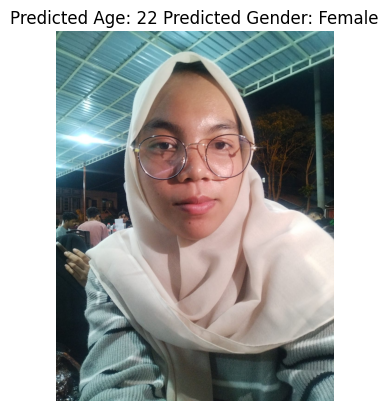

In [ ]:
img_to_test = 'drive/My Drive/ML/Test images/marni 1 test.jpg'
features = get_image_features(img_to_test)
pred = model.predict(features)
gender = gender_mapping[round(pred[0][0][0])]
age = round(pred[1][0][0])

plt.title(f'Predicted Age: {age} Predicted Gender: {gender}')
plt.axis('off')
plt.imshow(np.array(load_img(img_to_test)))

1/1 [==============================] - 0s 156ms/step


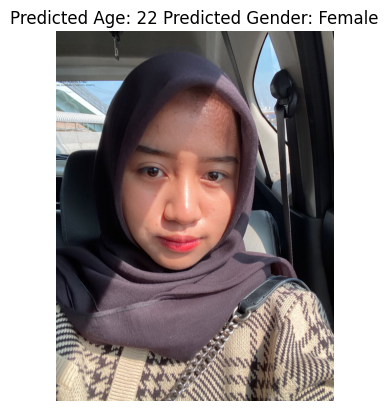

In [ ]:
img_to_test = 'drive/My Drive/ML/Test images/shafa test.jpg'
features = get_image_features(img_to_test)
pred = model.predict(features)
gender = gender_mapping[round(pred[0][0][0])]
age = round(pred[1][0][0])

plt.title(f'Predicted Age: {age} Predicted Gender: {gender}')
plt.axis('off')
plt.imshow(np.array(load_img(img_to_test)))

1/1 [==============================] - 0s 78ms/step


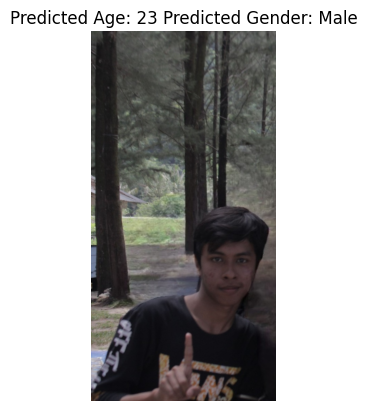

In [ ]:
img_to_test = 'drive/My Drive/ML/Test images/musliadi3.jpg'
features = get_image_features(img_to_test)
pred = model.predict(features)
gender = gender_mapping[round(pred[0][0][0])]
age = round(pred[1][0][0])

plt.title(f'Predicted Age: {age} Predicted Gender: {gender}')
plt.axis('off')
plt.imshow(np.array(load_img(img_to_test)))

1/1 [==============================] - 0s 52ms/step


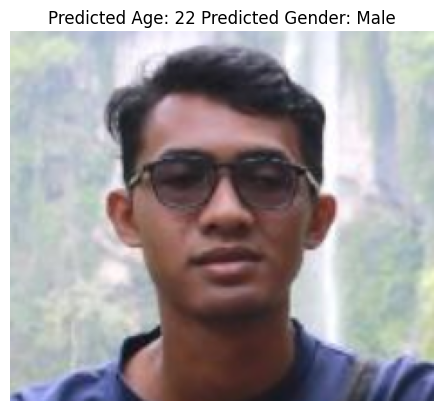

In [ ]:
img_to_test = 'drive/My Drive/ML/Test images/khairul.png'
features = get_image_features(img_to_test)
pred = model.predict(features)
gender = gender_mapping[round(pred[0][0][0])]
age = round(pred[1][0][0])

plt.title(f'Predicted Age: {age} Predicted Gender: {gender}')
plt.axis('off')
plt.imshow(np.array(load_img(img_to_test)))